In [2]:
import pandas as pd

# Load the dataset
file_path =("C:\\Users\\sathe\\OneDrive\\Desktop\\MAJOR PROJECT\\global-data-on-sustainable-energy (1).csv")
data= pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fo

In [3]:
data.shape

(3649, 21)

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
# Check the unique values in the 'Entity' column to ensure 'China' exists
print(data['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 'Lesot

In [6]:
# Filter the data for China
china_df = data[data['Entity'] == 'China'][['Year', 'Primary energy consumption per capita (kWh/person)', 'Entity']]

# Set 'Year' as the index and ensure it is in datetime format
china_df['Year'] = pd.to_datetime(china_df['Year'], format='%Y')
china_df.set_index('Year', inplace=True)

# Sort the dataframe by 'Year'
china_df.sort_index(inplace=True)

print(china_df)

            Primary energy consumption per capita (kWh/person) Entity
Year                                                                 
2000-01-01                                           9334.936   China
2001-01-01                                           9797.812   China
2002-01-01                                          10602.087   China
2003-01-01                                          12273.320   China
2004-01-01                                          14272.745   China
2005-01-01                                          16114.158   China
2006-01-01                                          17552.816   China
2007-01-01                                          18955.008   China
2008-01-01                                          19560.700   China
2009-01-01                                          20281.068   China
2010-01-01                                          21551.547   China
2011-01-01                                          23090.885   China
2012-01-01          

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(china_df['Primary energy consumption per capita (kWh/person)'])

# Extract and display the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

ADF Statistic: -20.99627221554794
p-value: 0.0
Critical Value (1%): -4.138
The data is stationary.
Critical Value (5%): -3.155
The data is stationary.
Critical Value (10%): -2.714
The data is stationary.


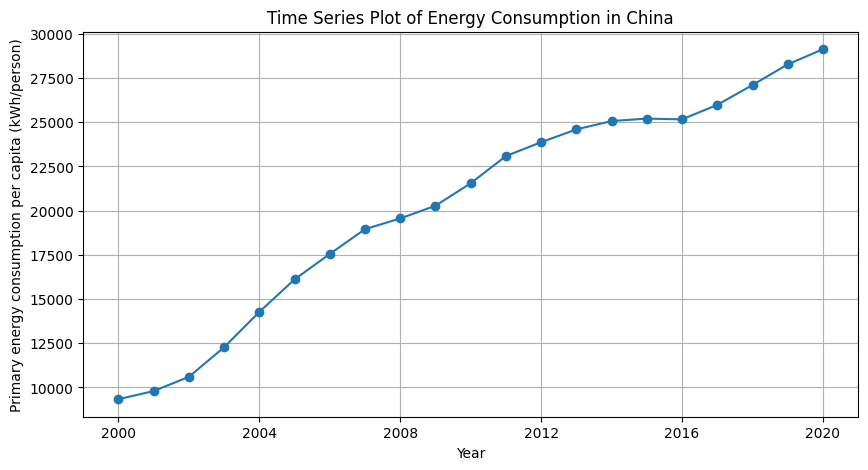

In [8]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(china_df.index, china_df['Primary energy consumption per capita (kWh/person)'], marker='o', linestyle='-')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.title('Time Series Plot of Energy Consumption in China')
plt.grid(True)
plt.show()



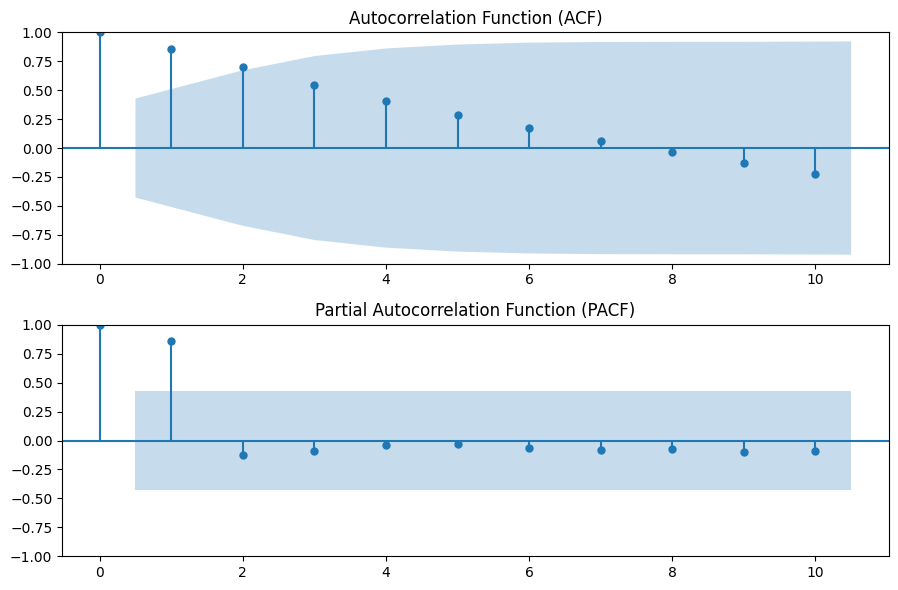

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(9, 6))

# ACF plot
plot_acf(china_df['Primary energy consumption per capita (kWh/person)'], ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(china_df['Primary energy consumption per capita (kWh/person)'], ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

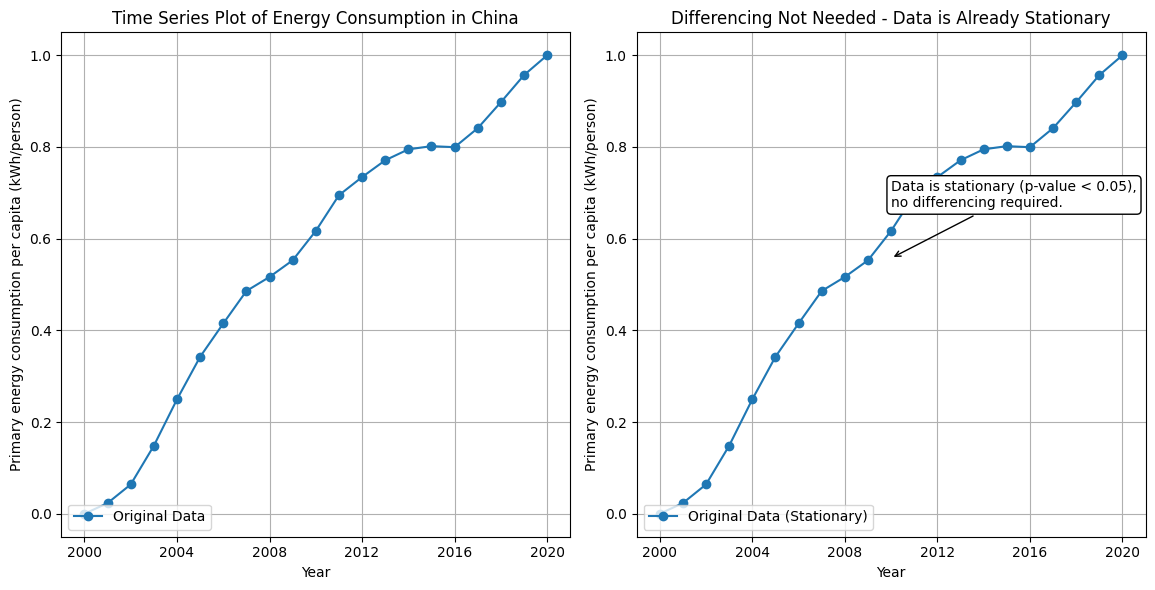

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot 1: Original Time Series
plt.subplot(1, 2, 1)
plt.plot(china_df.index, china_df['Primary energy consumption per capita (kWh/person)'], marker='o', linestyle='-', label="Original Data")
plt.xlabel('Year')
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.title('Time Series Plot of Energy Consumption in China')
plt.legend(loc="lower left")  # Move legend down
plt.grid(True)

# Plot 2: Same Time Series but with a Note
plt.subplot(1, 2, 2)
plt.plot(china_df.index, china_df['Primary energy consumption per capita (kWh/person)'], marker='o', linestyle='-', label="Original Data (Stationary)")
plt.xlabel('Year')
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.title('Differencing Not Needed - Data is Already Stationary')
plt.legend(loc="lower left")  # Move legend down
plt.grid(True)

# Set proper annotation coordinates within visible range
mid_year = china_df.index[len(china_df)//2]  
mid_value = china_df['Primary energy consumption per capita (kWh/person)'].mean()

# Adjusted annotation position
plt.annotate("Data is stationary (p-value < 0.05),\nno differencing required.", 
             xy=(mid_year, mid_value), 
             xytext=(mid_year, mid_value + (mid_value * 0.2)),  # Moves text slightly above mid_value
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=10, color="black",
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


In [11]:
# Split data into training and testing sets (train data: 1990-2014, test data: 2015-2019)
train = china_df[:'2014']
test = china_df['2015':]


In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [13]:
# Function to get the best lag using cross-validation
def get_best_lag(data, max_lag=3):
    best_lag = None
    best_score = float('inf')  # Start with a large value for comparison
    
    # TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # Loop through lag values from 1 to max_lag
    for lag in range(1, max_lag + 1):
        mse_scores = []
        
        # Perform cross-validation
        for train_idx, val_idx in tscv.split(data):
            train_data, val_data = data.iloc[train_idx], data.iloc[val_idx]
            
            # Fit AutoReg model
            try:
                model = AutoReg(train_data, lags=lag)
                model_fitted = model.fit()
                predictions = model_fitted.predict(start=val_idx[0], end=val_idx[-1], dynamic=False)
                
                # Calculate Mean Squared Error for the predictions
                mse = mean_squared_error(val_data, predictions)
                mse_scores.append(mse)
            except ValueError as e:
                print(f"Error with lag={lag}: {e}")
                continue
        
        # Calculate the average MSE for this lag
        avg_mse = np.mean(mse_scores)
        
        # Update the best lag if a lower MSE is found
        if avg_mse < best_score:
            best_score = avg_mse
            best_lag = lag
            
    return best_lag


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example dataframe (replace with your actual data)
china_df = data[data['Entity'] == 'China'][['Year', 'Primary energy consumption per capita (kWh/person)', 'Entity']]

# Step 1: Convert the 'Year' column to datetime format
china_df['Year'] = pd.to_datetime(china_df['Year'], format='%Y')

# Step 2: Set the 'Year' as the index
china_df.set_index('Year', inplace=True)

# Step 3: Sort the DataFrame by the 'Year' index
china_df.sort_index(inplace=True)

from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to the numeric column
scaler = MinMaxScaler()

# Apply scaling only to the numeric column
china_df['Primary energy consumption per capita (kWh/person)'] = scaler.fit_transform(
    china_df[['Primary energy consumption per capita (kWh/person)']])

# Display the resulting DataFrame
print(china_df)



            Primary energy consumption per capita (kWh/person) Entity
Year                                                                 
2000-01-01                                           0.000000   China
2001-01-01                                           0.023379   China
2002-01-01                                           0.064001   China
2003-01-01                                           0.148411   China
2004-01-01                                           0.249397   China
2005-01-01                                           0.342402   China
2006-01-01                                           0.415065   China
2007-01-01                                           0.485887   China
2008-01-01                                           0.516479   China
2009-01-01                                           0.552863   China
2010-01-01                                           0.617032   China
2011-01-01                                           0.694780   China
2012-01-01          

In [15]:
# Get the best lag with a reduced maximum lag if necessary (max_lag=3 as an example)
import warnings
warnings.filterwarnings('ignore')
best_lag = get_best_lag(china_df['Primary energy consumption per capita (kWh/person)'], max_lag=3)

# Print the best lag value
print(f"The best lag is: {best_lag}")



Error with lag=3: The model specification cannot be estimated. The model contains 4 regressors (1 trend, 0 seasonal, 3 lags) but after adjustment for hold_back and creation of the lags, there are only 3 data points available to estimate parameters.
The best lag is: 3


In [16]:
# Now train the model with the optimal lag and predict for future values (2021-2025)
train_data = china_df['Primary energy consumption per capita (kWh/person)'][:-5]  # Use data until 2020 for training
test_data = china_df['Primary energy consumption per capita (kWh/person)'][-5:]  # Last 5 years for testing

# Fit the AutoReg model with the best lag
model = AutoReg(train_data, lags=2)
model_fitted = model.fit()

# Make predictions for the next 5 years (2021-2025)
future_index = pd.date_range(start='2020', end='2025', freq='A')  # Annual frequency for 2021-2025
forecast = model_fitted.predict(start=future_index[0], end=future_index[-1], dynamic=False)

# Print the forecasted values for 2021-2025
print("Forecasted values for 2021-2025:")
print(forecast)


Forecasted values for 2021-2025:
2021-01-01    0.852370
2022-01-01    0.858273
2023-01-01    0.863362
2024-01-01    0.867719
2025-01-01    0.871431
Freq: AS-JAN, dtype: float64


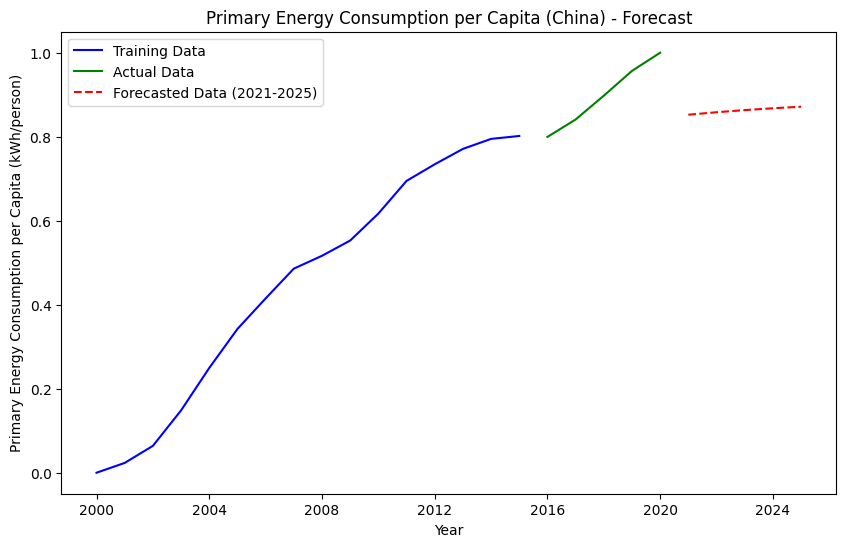

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot the training data
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# Plot the actual data (for the last years)
plt.plot(test_data.index, test_data, label='Actual Data', color='green')

# Plot the forecasted data
plt.plot(future_index, forecast, label='Forecasted Data (2021-2025)', color='red', linestyle='--')

plt.legend()
plt.title('Primary Energy Consumption per Capita (China) - Forecast')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh/person)')
plt.show()


In [18]:
print(len(test_data))   # Check the length of test data
print(len(forecast))    # Check the length of forecast



5
5


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate MSE
mse_test = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error (MSE) for Test Data: {mse_test}")

# Calculate RMSE
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) for Test Data: {rmse_test}")

# Calculate MAE
mae_test = mean_absolute_error(test_data, forecast)
print(f"Mean Absolute Error (MAE) for Test Data: {mae_test}")





Mean Squared Error (MSE) for Test Data: 0.005744927176086113
Root Mean Squared Error (RMSE) for Test Data: 0.0757952978494452
Mean Absolute Error (MAE) for Test Data: 0.06440049715848595
